In [4]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [5]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is:       23.33
The standard deviation of all vehicle's MPG is:       5.94


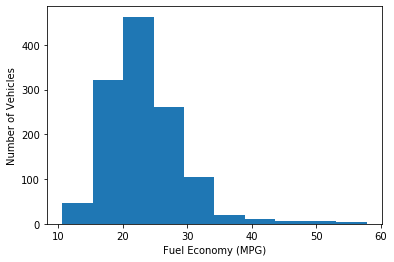

In [6]:
# Calculate the summary statistics and plot the histogram of 
# the entire population data
print(f"The mean MPG of all vehicles is: \
      {round(fuel_economy.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: \
      {round(fuel_economy.Combined_MPG.std(),2)}")
plt.hist(fuel_economy.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is:       18.48
The standard deviation of all vehicle's MPG is:       2.41


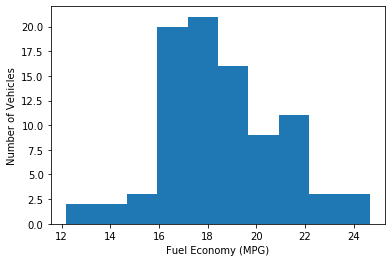

In [7]:
# Calculate the summary statistics and plot the histogram of the 
# sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: \
      {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: \
      {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is:       23.29
The standard deviation of all vehicle's MPG is:       7.67


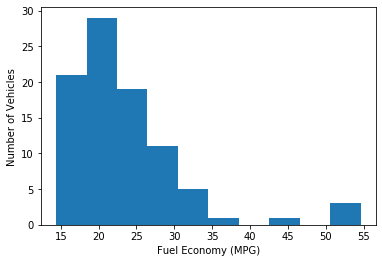

In [13]:
# Calculate the summary statistics and plot the histogram 
# of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: \
      {round(subset.Combined_MPG.mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: \
      {round(subset.Combined_MPG.std(),2)}")
plt.hist(subset.Combined_MPG)
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [19]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(160)
print(f"The SEM value for the sample fuel economy data is \
      {sem(sample.Combined_MPG)}")

The SEM value for the sample fuel economy data is       0.4953428687201844


In [22]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]
vehicle_sample_set[0]

,Type,Combined_MPG,Make_Model
212,Subcompact Cars,19.0000,LEXUS_RC F
668,Large Cars,20.5095,Mercedes-Benz_S 560
24,Two Seaters,18.6648,Jaguar_F-TYPE Convertible Manual
645,Large Cars,19.9822,Jaguar_XJ AWD
135,Subcompact Cars,16.6449,Aston Martin Lagonda Ltd_Rapide S
161,Subcompact Cars,24.1256,BMW_M240i Coupe
1092,Small SUV 4WD,25.2200,Mitsubishi Motors Corporation_OUTLANDER SPORT 4WD
767,Standard Pick-up Trucks 2WD,16.8203,Chevrolet_C10 SILVERADO 2WD
336,Compact Cars,34.0784,MAZDA_MAZDA2
210,Subcompact Cars,22.8079,LEXUS_RC 350


In [23]:
# Generate the plot data for each sample 
means = [sample.Combined_MPG.mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample.Combined_MPG) for sample in 
                   vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

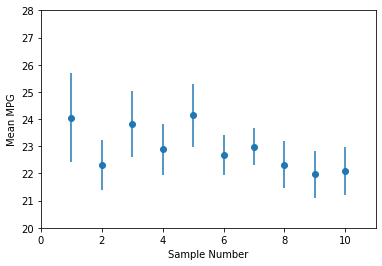

In [24]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()